In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load the data
df= pd.read_excel('/kaggle/input/titanic-dataset/Titanic_dataset.xlsx')

In [2]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64
            pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean      2.294882     0.381971    29.881135     0.498854     0.385027   
std       0.837836     0.486055    14.413500     1.041658     0.865560   
min       1.000000     0.000000     0.166700     0.000000     0.000000   
25%       2.000000     0.000000    21.000000     0.000000     0.000000   
50%       3.000000     0.000000    28.000000     0.000000     0.000000   
75%       3.000000     1.000000    39.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     9.000000   

              fare        body  
count  1308.000000  121.000000  
me

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


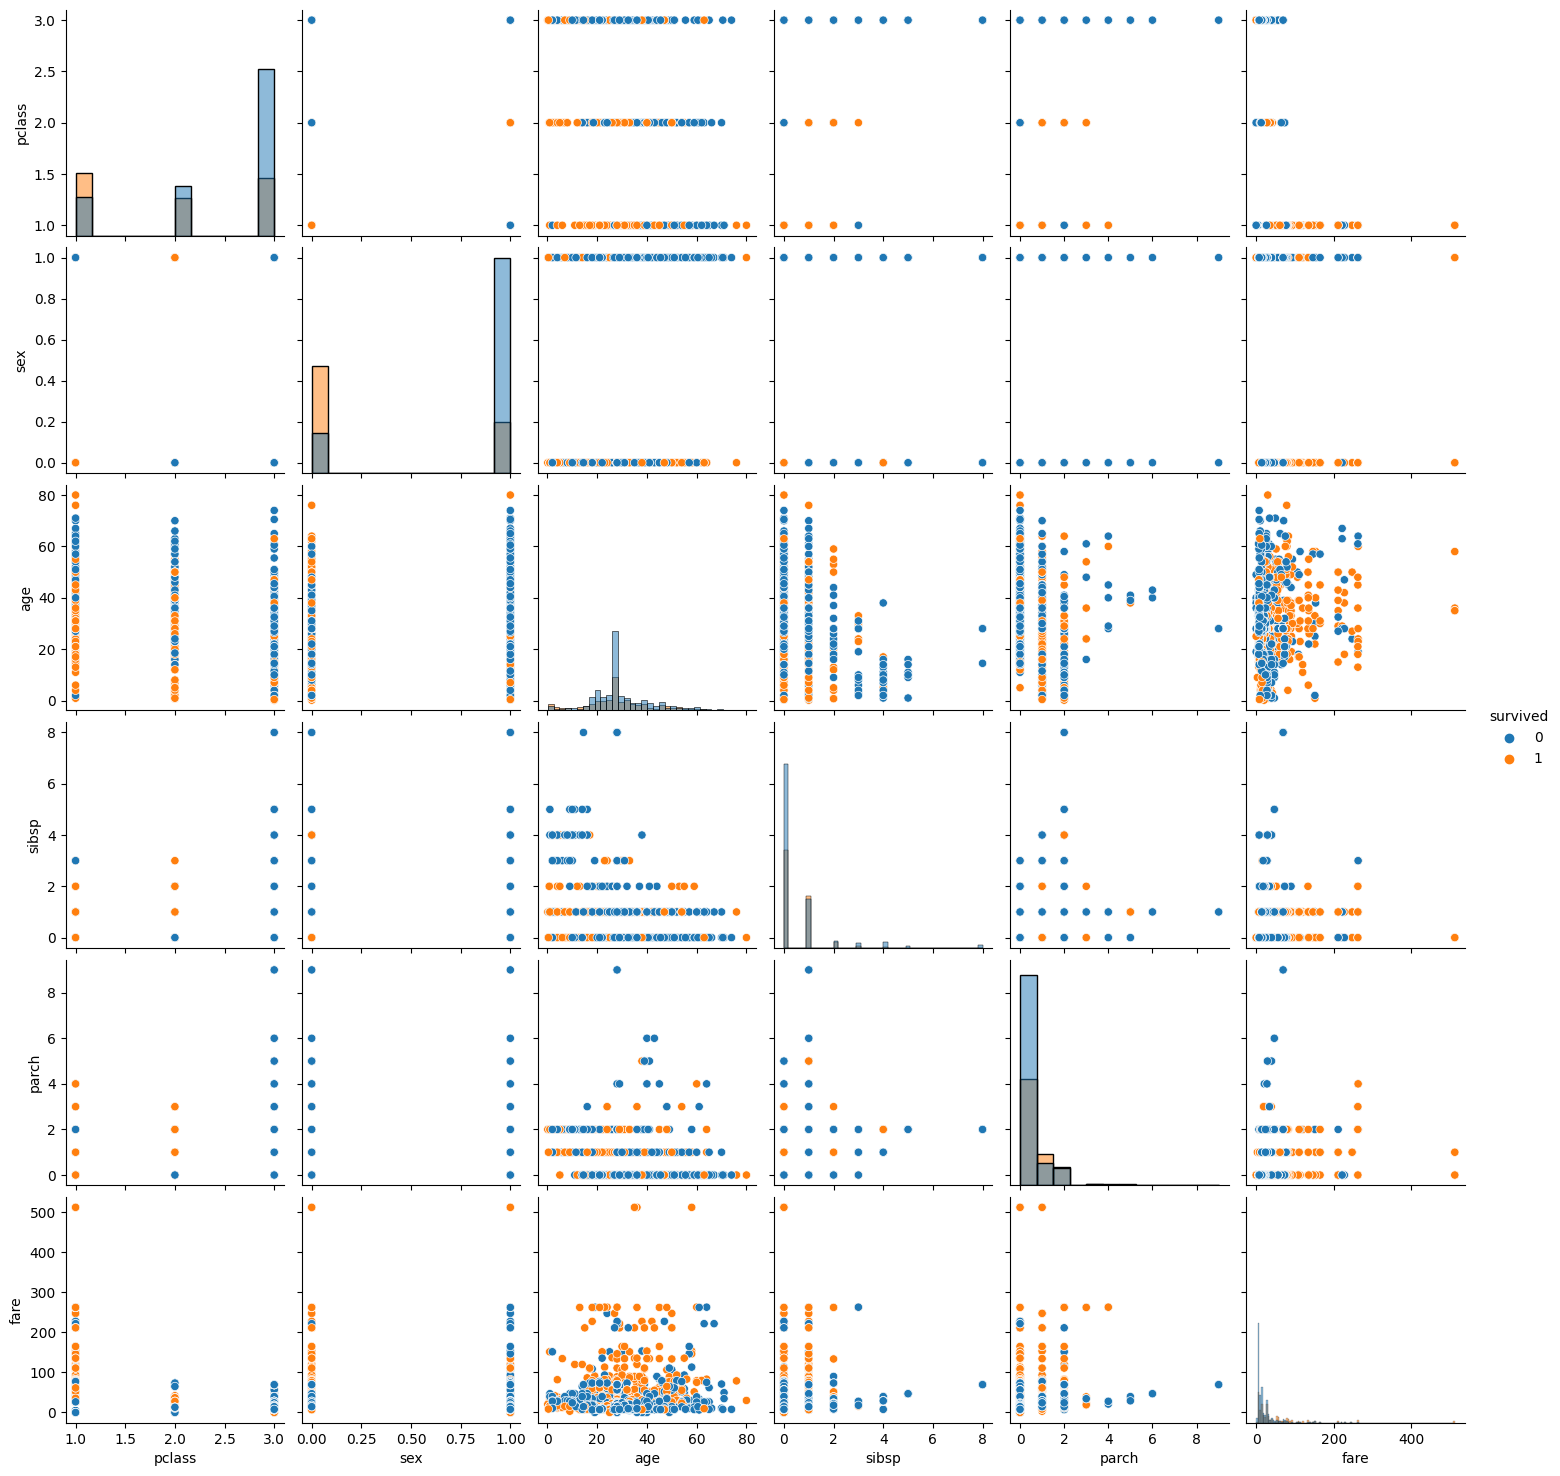

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_excel('/kaggle/input/titanic-dataset/Titanic_dataset.xlsx')

# Checking missing values
print(df.isnull().sum())

# Descriptive statistics
print(df.describe())

# Selecting relevant columns
selected_columns = ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']
data = df[selected_columns].copy()

# Handling missing values
data['age'].fillna(data['age'].median(), inplace=True)
data['fare'].fillna(data['fare'].median(), inplace=True)

# Convert categorical variables ('sex') into numerical using Label Encoding or get_dummies
data['sex'] = pd.get_dummies(data['sex'], drop_first=True)  # Assuming male = 1, female = 0

# Data visualization
sns.pairplot(data, hue='survived', diag_kind='hist')
plt.show()

For the logistic regression model, selecting the relevant columns from the Titanic dataset is essential. Here are the columns you might consider including and why:

1. **Survived**: This is the target variable indicating whether a passenger survived or not. It's the dependent variable you're trying to predict.

2. **Pclass**: The passenger class might influence survival rates. There might be a correlation between socio-economic status (reflected by class) and the likelihood of survival.

3. **Sex**: There might be differences in survival rates based on gender, as historically, women and children were given preference in lifeboats.

4. **Age**: Age could be a significant factor, as children and the elderly might have had different survival rates compared to adults.

5. **SibSp & Parch**: These columns represent the number of siblings/spouses and parents/children aboard. They could indicate family size, which might have influenced survival behavior.

6. **Fare**: Fare might also be associated with socio-economic status and, consequently, survival chances.

Columns like `Ticket`, `Name`, `Cabin`, `Embarked`, `Boat`, `Body`, and `Home.dest` might not be necessary for the regression model. These columns either contain non-quantitative information, have many missing values, or don't directly relate to survival chances based on initial assessment.

In [4]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [5]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [6]:
selected_columns = ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']
data = df[selected_columns].copy()


In [7]:
# Handling missing values in 'age' and 'fare'
data['age'].fillna(data['age'].median(), inplace=True)
data['fare'].fillna(data['fare'].median(), inplace=True)


In [8]:
# Convert categorical variables ('sex') into numerical using Label Encoding or get_dummies
data['sex'] = pd.get_dummies(data['sex'], drop_first=True)  # Assuming male = 1, female = 0


In [9]:
# Splitting the data into training and testing sets
X = data.drop('survived', axis=1)
y = data['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Scaling numerical features if needed (e.g., 'age', 'fare')
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Fit the model on the training data
log_reg.fit(X_train_scaled, y_train)


LogisticRegression()

In [12]:
# Evaluate the model on the test set
accuracy = log_reg.score(X_test_scaled, y_test)
print(f"Accuracy of Logistic Regression Model: {accuracy}")


Accuracy of Logistic Regression Model: 0.7709923664122137


In [14]:
import pickle
#extracting the model file
with open(f"LogisticRegression_TitanicDataset","wb") as f:
    pickle.dump(log_reg,f)